In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('covid_19.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
df.shape

(49068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df['WHO Region'].value_counts()

Europe                   15040
Western Pacific          10340
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
South-East Asia           1880
Name: WHO Region, dtype: int64

In [7]:
df=df.drop('Province/State',axis=1)

In [8]:
df=df.rename(columns={'Country/Region' :'Country'})

In [9]:
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,49068.0,21.433730,24.950320,-51.7963,7.873054,23.6345,41.204380,7.170690e+01
Long,49068.0,23.528236,70.442740,-135.0000,-15.310100,21.7453,80.771797,1.780650e+02
Confirmed,49068.0,16884.904255,127300.205272,0.0000,4.000000,168.0000,1518.250000,4.290259e+06
Deaths,49068.0,884.179160,6313.584411,0.0000,0.000000,2.0000,30.000000,1.480110e+05
Recovered,49068.0,7915.713479,54800.918731,0.0000,0.000000,29.0000,666.000000,1.846641e+06
Active,49068.0,8085.011617,76258.903026,-14.0000,0.000000,26.0000,606.000000,2.816444e+06


In [11]:
df.groupby('Country')['Active'].sum()

Country
Afghanistan           1089052
Albania                 72117
Algeria                345886
Andorra                 19907
Angola                  15011
                       ...   
West Bank and Gaza     170967
Western Sahara            190
Yemen                   25694
Zambia                  43167
Zimbabwe                37706
Name: Active, Length: 187, dtype: int64

In [12]:
df.groupby('Country')['Confirmed'].sum()

Country
Afghanistan           1936390
Albania                196702
Algeria               1179755
Andorra                 94404
Angola                  22662
                       ...   
West Bank and Gaza     233461
Western Sahara            901
Yemen                   67180
Zambia                 129421
Zimbabwe                50794
Name: Confirmed, Length: 187, dtype: int64

In [13]:
df.groupby('Date')['Deaths'].sum()

Date
2020-01-22        17
2020-01-23        18
2020-01-24        26
2020-01-25        42
2020-01-26        56
               ...  
2020-07-23    633506
2020-07-24    639650
2020-07-25    644517
2020-07-26    648621
2020-07-27    654036
Name: Deaths, Length: 188, dtype: int64

In [14]:
df.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'WHO Region'],
      dtype='object')

In [15]:
top=df[df['Date']==df['Date'].max()]
top

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [16]:
c=top.groupby('Country')['Confirmed','Deaths','Recovered','Active'].sum()
c

<ipython-input-16-80d3207788cf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c=top.groupby('Country')['Confirmed','Deaths','Recovered','Active'].sum()


,Confirmed,Deaths,Recovered,Active
Country,,,,
Afghanistan,36263,1269,25198,9796
Albania,4880,144,2745,1991
Algeria,27973,1163,18837,7973
Andorra,907,52,803,52
Angola,950,41,242,667
...,...,...,...,...
West Bank and Gaza,10621,78,3752,6791
Western Sahara,10,1,8,1
Yemen,1691,483,833,375


In [17]:
import plotly.express as px

In [18]:
gp=df.groupby('Country')['Confirmed',	'Deaths',	'Recovered',	'Active'].sum().reset_index()
gp

<ipython-input-18-c63d39624e98>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gp=df.groupby('Country')['Confirmed',	'Deaths',	'Recovered',	'Active'].sum().reset_index()


,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [19]:
x_death=px.choropleth(gp,locations='Country',locationmode='country names',
                color='Deaths',hover_name='Country',range_color=[1,40000],
                color_continuous_scale='viridis',title='Death case country wise')
x_death

In [20]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].dt.date

In [21]:
x_active=px.choropleth(gp,locations='Country',locationmode='country names',
                color='Active',hover_name='Country',range_color=[1,40000],
                color_continuous_scale='viridis',title='Active case country wise')
x_active

In [22]:
x_Confirmed=px.choropleth(gp,locations='Country',locationmode='country names',
                color='Confirmed',hover_name='Country',range_color=[1,40000],
                color_continuous_scale='viridis',title='Confirmed case country wise')
x_Confirmed

In [23]:
x_Recovered	=px.choropleth(gp,locations='Country',locationmode='country names',
                color='Recovered',hover_name='Country',range_color=[1,40000],
                color_continuous_scale='viridis',title='Recovered case country wise')
x_Recovered

In [24]:
x_death=px.choropleth(df,locations='Country',locationmode='country names',
                color='Deaths',animation_frame='Date',hover_name='Country',range_color=[1,40000],
                color_continuous_scale='viridis',title='Death case country wise')
x_death

In [25]:
t_Confirmed=df.groupby('Date')['Confirmed'].sum().reset_index()
t_Confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [26]:
t_active=df.groupby('Date')['Active'].sum().reset_index()
t_active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


Text(0.5, 1.0, 'Total Active cases over time')

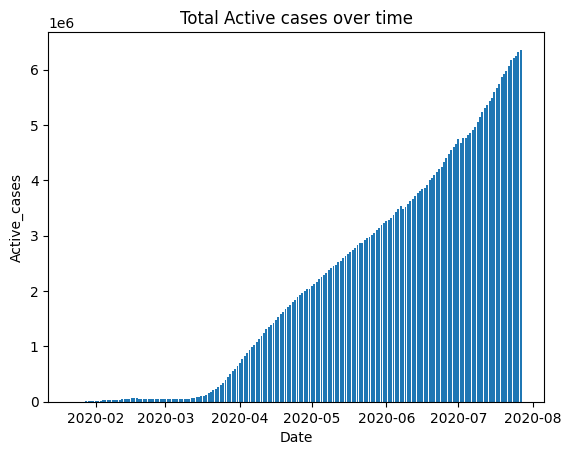

In [27]:
plt.bar(t_active['Date'],t_active['Active'])
plt.xlabel('Date')
plt.ylabel('Active_cases')
plt.title('Total Active cases over time')


Text(0.5, 1.0, 'Total Confirmed cases over time')

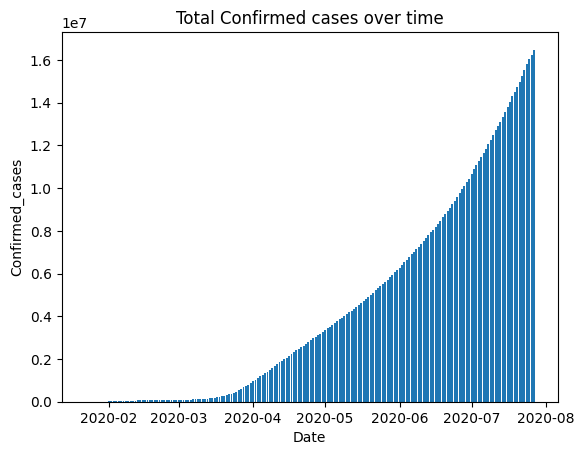

In [28]:
plt.bar(t_Confirmed['Date'],t_Confirmed['Confirmed'])
plt.xlabel('Date')
plt.ylabel('Confirmed_cases')
plt.title('Total Confirmed cases over time')

In [29]:
t_Deaths=df.groupby('Date')['Deaths'].sum().reset_index()
t_Deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [30]:
t_Recovered=df.groupby('Date')['Recovered'].sum().reset_index()
t_Recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


Text(0.5, 1.0, 'Total Deaths cases over time')

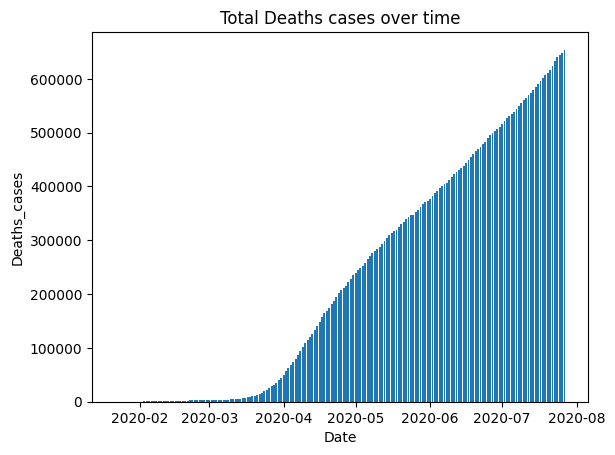

In [31]:
plt.bar(t_Deaths['Date'],t_Deaths['Deaths'])
plt.xlabel('Date')
plt.ylabel('Deaths_cases')
plt.title('Total Deaths cases over time')

Text(0.5, 1.0, 'Total Recovered cases over time')

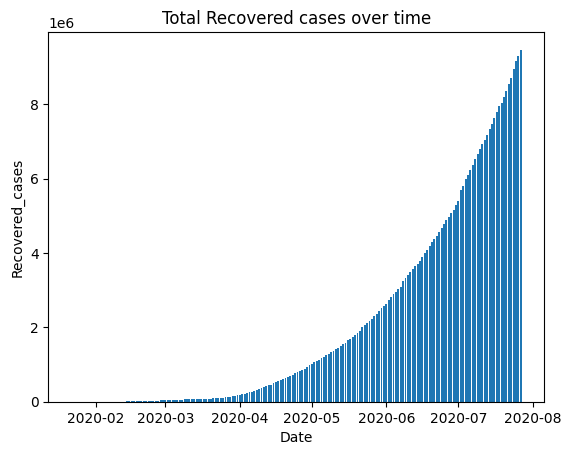

In [32]:
plt.bar(t_Recovered['Date'],t_Recovered['Recovered'])
plt.xlabel('Date')
plt.ylabel('Recovered_cases')
plt.title('Total Recovered cases over time')

In [33]:
top_20=df.groupby('Country')['Active'].sum().reset_index().sort_values(by = 'Active',ascending = False).head(20)
top_20

,Country,Active
173,US,156981121
23,Brazil,31094060
177,United Kingdom,22624595
138,Russia,19668578
79,India,15987913
61,France,10980287
157,Spain,9277432
32,Canada,8656985
132,Peru,7748957
85,Italy,7363518


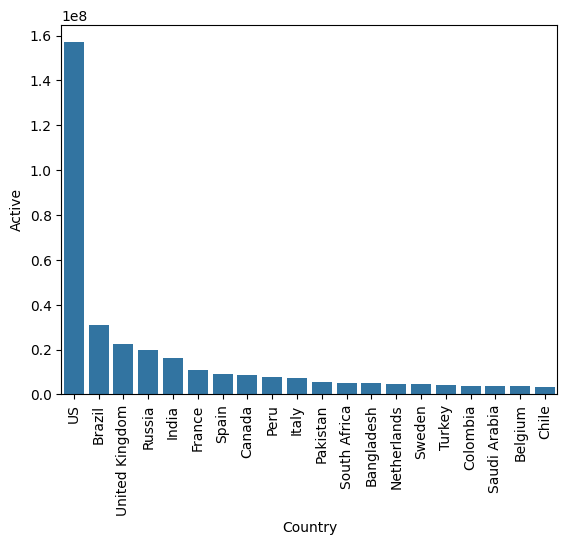

In [34]:
sns.barplot(x='Country',y='Active',data=top_20)
plt.xticks(rotation=90)
plt.show()

**Forecasting using Facebook Prophet**

In [35]:
!pip install Prophet

In [36]:
from prophet import Prophet

In [38]:
#Confirmed cases

t_Confirmed.columns=['ds','y']
t_Confirmed['ds']=pd.to_datetime(t_Confirmed['ds'])

model=Prophet()
model.fit(t_Confirmed)

future=model.make_future_dataframe(periods=7,freq='D')

forecast=model.predict(future)
forecast[['yhat' ,'yhat_lower',	'yhat_upper']]=forecast[['yhat','yhat_lower','yhat_upper']].astype(int)

forecast[['ds','yhat','yhat_lower','yhat_upper']]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvhohaw1/0ar17cn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvhohaw1/prpy2hor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2684', 'data', 'file=/tmp/tmprvhohaw1/0ar17cn3.json', 'init=/tmp/tmprvhohaw1/prpy2hor.json', 'output', 'file=/tmp/tmprvhohaw1/prophet_model4s537pko/prophet_model-20240123170624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:06:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:06:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-20676,-129320,88030
1,2020-01-23,-8050,-111615,96704
2,2020-01-24,5827,-94278,109388
3,2020-01-25,12176,-93921,119989
4,2020-01-26,8405,-92648,109248
...,...,...,...,...
190,2020-07-30,16743908,16634737,16845480
191,2020-07-31,16959097,16856323,17065888
192,2020-08-01,17166757,17057439,17277026
193,2020-08-02,17364296,17258459,17482810


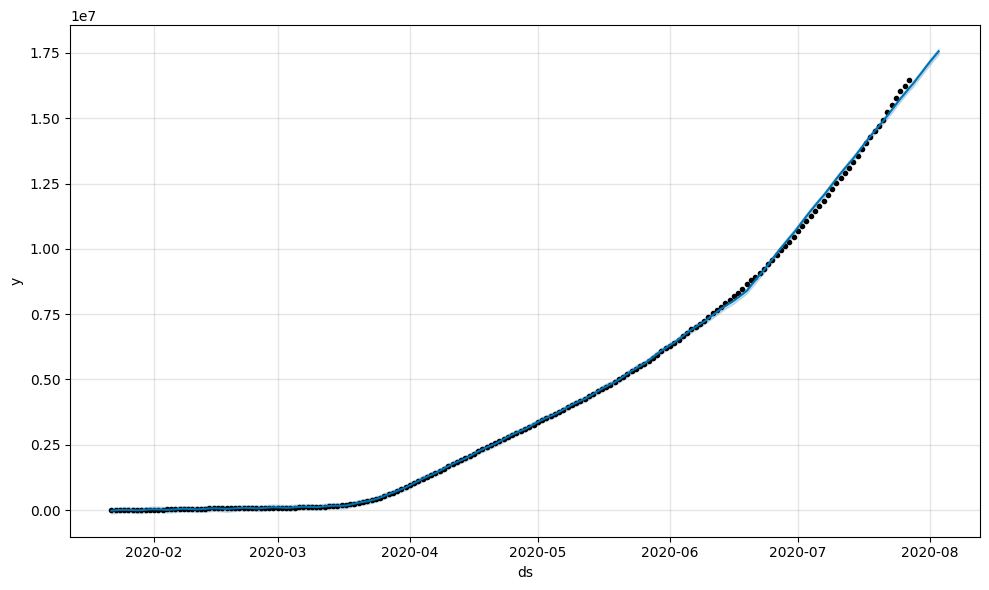

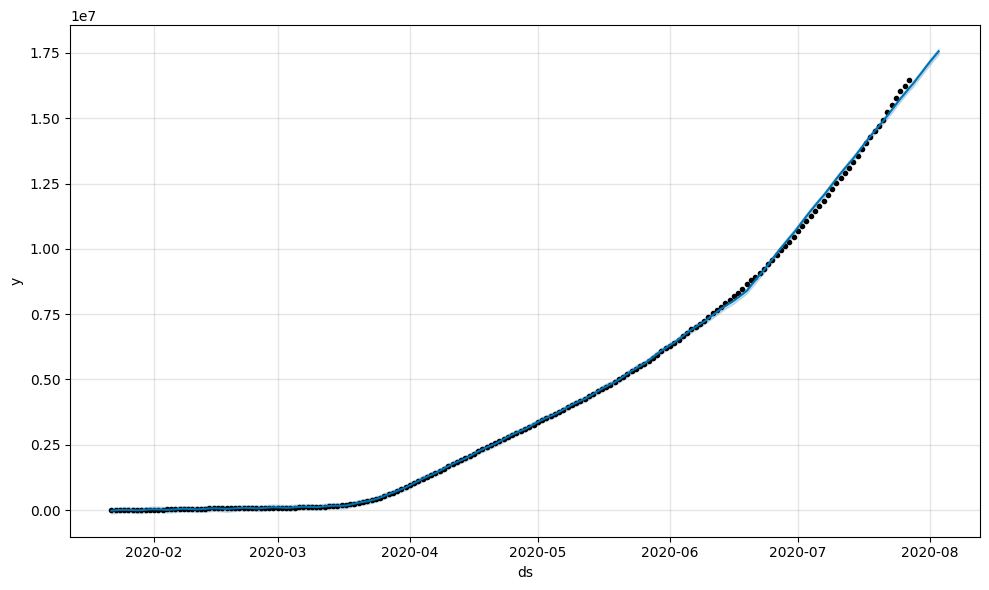

In [40]:
model.plot(forecast)

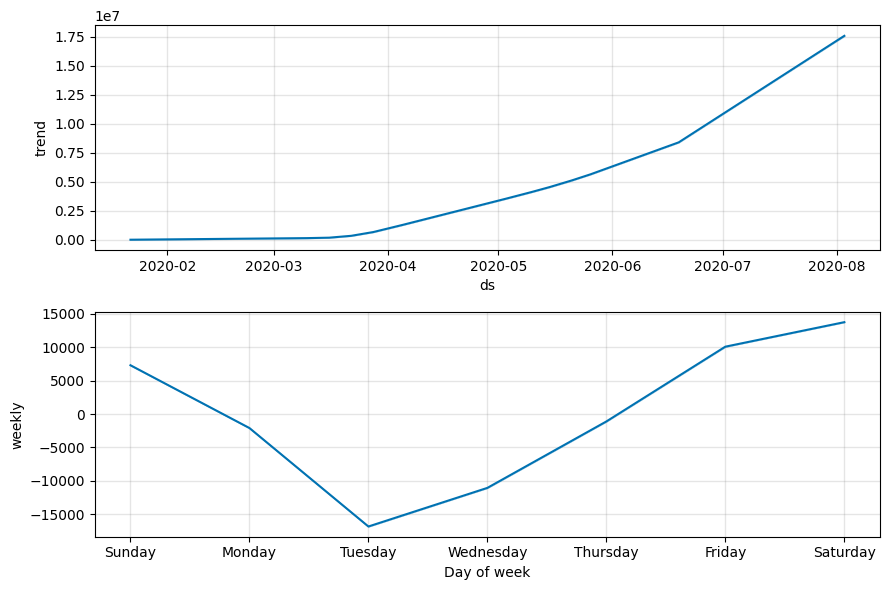

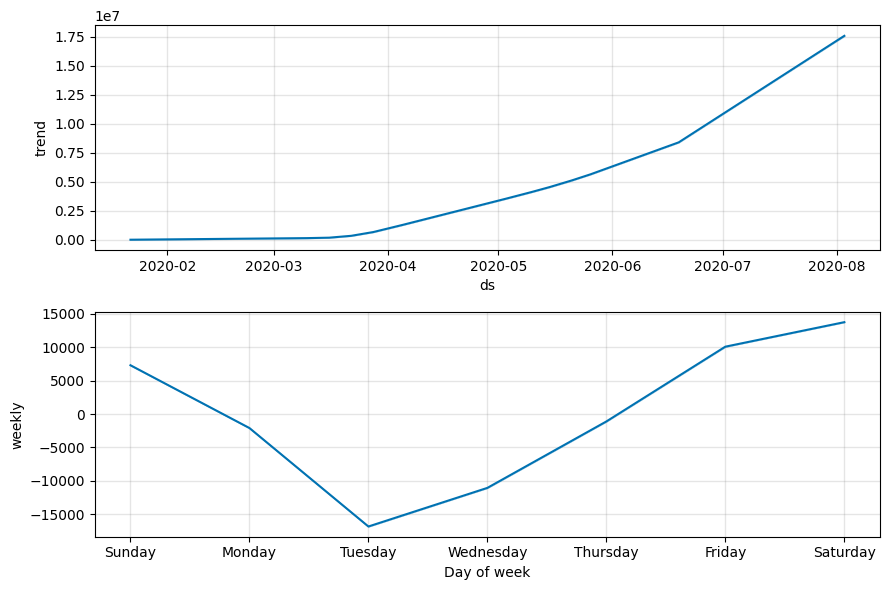

In [41]:
model.plot_components(forecast)

#Conclusion
1.On trend basis graph we can say that there is exponential growth in confirmed Cases.

2.On weekly basis graph we can say that on tuesday the confirmed cases rate is low and is increasing as it tends to saturday.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvhohaw1/_j4848ma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvhohaw1/1qyl6h4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20844', 'data', 'file=/tmp/tmprvhohaw1/_j4848ma.json', 'init=/tmp/tmprvhohaw1/1qyl6h4h.json', 'output', 'file=/tmp/tmprvhohaw1/prophet_models4_nx42_/prophet_model-20240123173637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:36:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:36:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds    yhat  yhat_lower  yhat_upper
0   2020-01-22    -713       -2643        1216
1   2020-01-23     -43       -2055        1700
2   2020-01-24     531       -1465        2337
3   2020-01-25     473       -1504        2428
4   2020-01-26    -328       -2338        1670
..         ...     ...         ...         ...
190 2020-07-30  663491      661286      665545
191 2020-07-31  669006      666732      671236
192 2020-08-01  673888      671317      676233
193 2020-08-02  678025      675308      680518
194 2020-08-03  682315      679166      684991

[195 rows x 4 columns]
Figure(1000x600)
Figure(900x600)


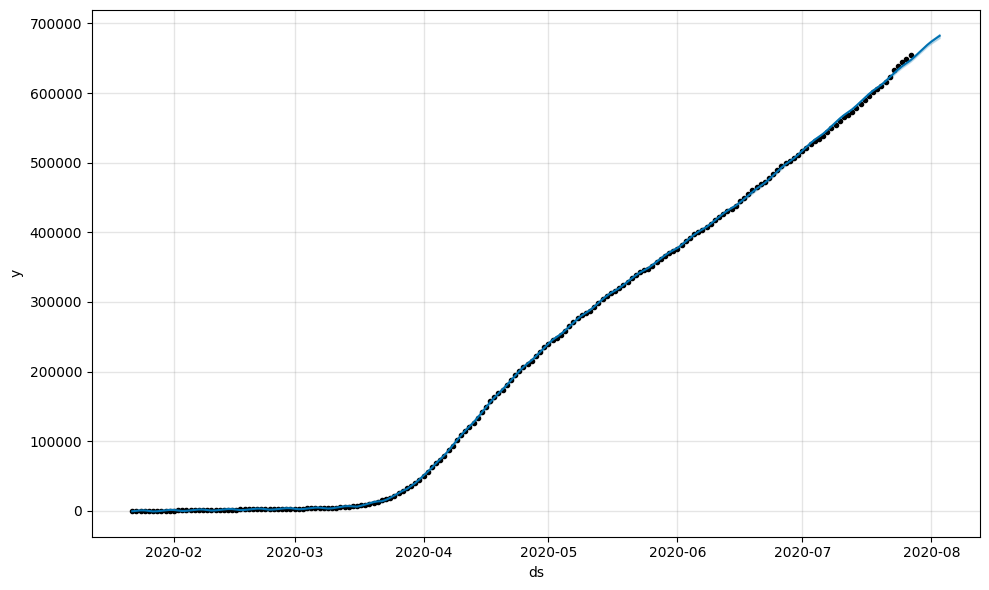

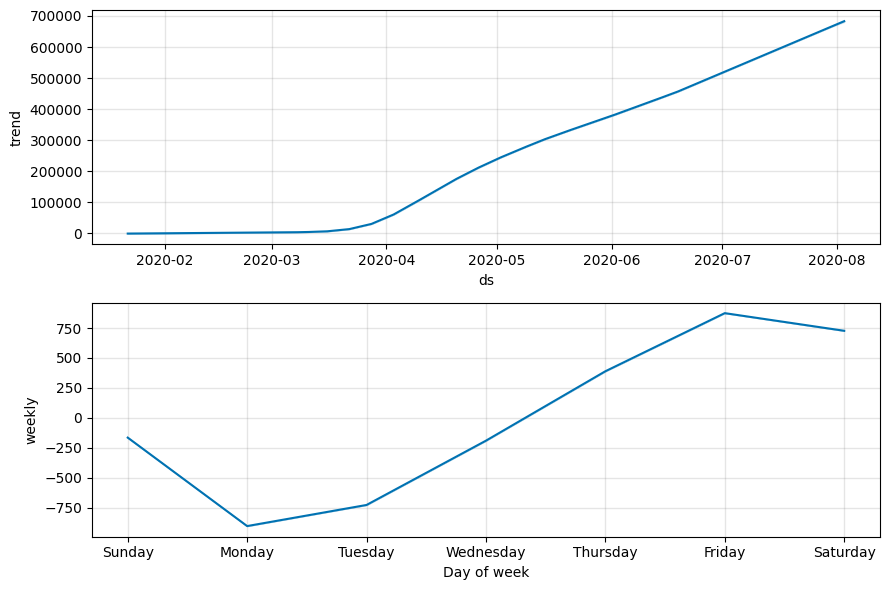

In [43]:
# Death Cases
t_Deaths.columns=['ds','y']
t_Deaths['ds']=pd.to_datetime(t_Deaths['ds'])

model=Prophet()
model.fit(t_Deaths)

future=model.make_future_dataframe(periods=7,freq='D')

forecast=model.predict(future)
forecast[['yhat' ,'yhat_lower',	'yhat_upper']]=forecast[['yhat','yhat_lower','yhat_upper']].astype(int)

print(forecast[['ds','yhat','yhat_lower','yhat_upper']])
print(model.plot(forecast))
print(model.plot_components(forecast))

#Conclusion
1.On trend basis graph we can say that there is linear increase in Death Cases.

2.On weekly basis graph we can say that on monday the Death rate is low and is increasing as it tends to saturday.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvhohaw1/x422ehhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvhohaw1/86m7pfkf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86010', 'data', 'file=/tmp/tmprvhohaw1/x422ehhp.json', 'init=/tmp/tmprvhohaw1/86m7pfkf.json', 'output', 'file=/tmp/tmprvhohaw1/prophet_modelgtcj2vq7/prophet_model-20240123173836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:38:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:38:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds     yhat  yhat_lower  yhat_upper
0   2020-01-22    -6240      -56096       41589
1   2020-01-23    -1186      -43590       44564
2   2020-01-24     6450      -37269       53925
3   2020-01-25     8209      -36363       56326
4   2020-01-26    15096      -34845       56167
..         ...      ...         ...         ...
190 2020-07-30  6481273     6435389     6528221
191 2020-07-31  6549315     6503473     6595752
192 2020-08-01  6611479     6562421     6660012
193 2020-08-02  6678771     6628106     6727974
194 2020-08-03  6732521     6682540     6783911

[195 rows x 4 columns]
Figure(1000x600)
Figure(900x600)


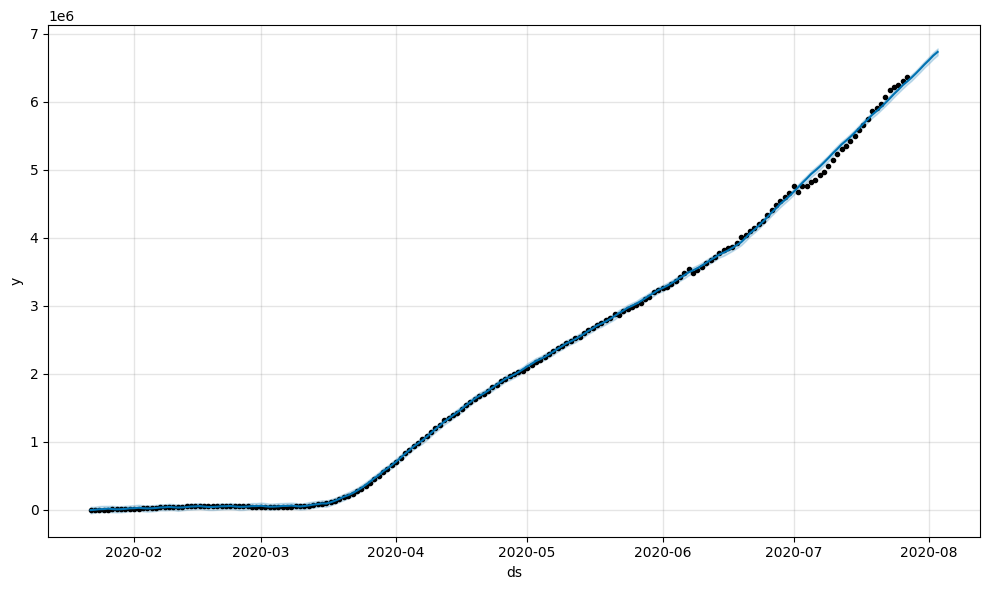

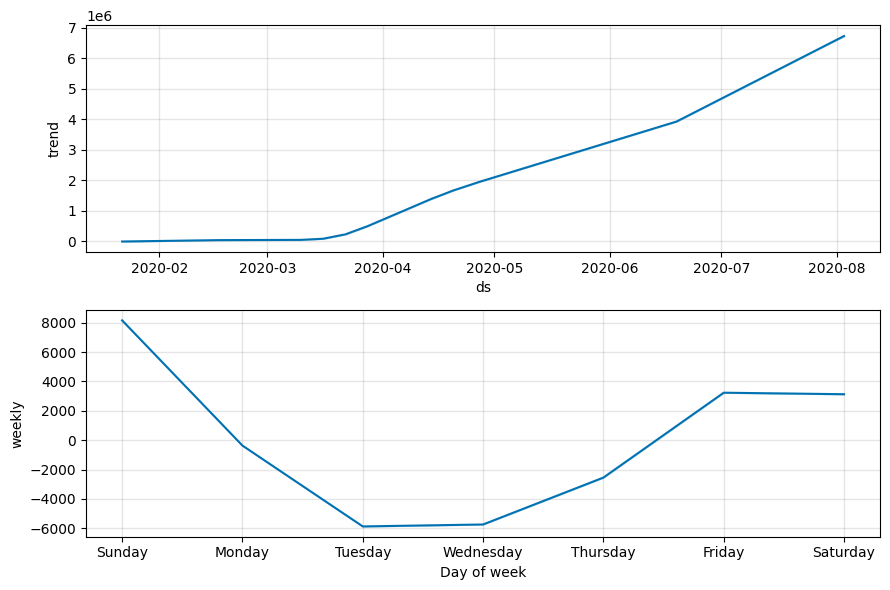

In [44]:
# Active Cases
t_active.columns=['ds','y']
t_active['ds']=pd.to_datetime(t_active['ds'])

model=Prophet()
model.fit(t_active)

future=model.make_future_dataframe(periods=7,freq='D')

forecast=model.predict(future)
forecast[['yhat','yhat_lower','yhat_upper']]=forecast[['yhat','yhat_lower','yhat_upper']].astype(int)

print(forecast[['ds','yhat','yhat_lower','yhat_upper']])
print(model.plot(forecast))
print(model.plot_components(forecast))

# Conclusion
1.On trend basis graph we can say that after 3/2020 there is linear growth in active Cases.

2.On weekly basis graph we can say that on tuesday the active case rate is low and is increasing as it tends to saturday.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvhohaw1/kxq5p2o0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvhohaw1/8ou1pv7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47198', 'data', 'file=/tmp/tmprvhohaw1/kxq5p2o0.json', 'init=/tmp/tmprvhohaw1/8ou1pv7l.json', 'output', 'file=/tmp/tmprvhohaw1/prophet_modelt01pj_6j/prophet_model-20240123174308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
0   2020-01-22    -18442      -99496       60755
1   2020-01-23    -11181      -90399       71802
2   2020-01-24     -5175      -87776       71052
3   2020-01-25      -407      -73043       81080
4   2020-01-26     -9825      -89830       65554
..         ...       ...         ...         ...
190 2020-07-30   9595783     9522870     9677107
191 2020-07-31   9737182     9653729     9822518
192 2020-08-01   9877343     9791932     9961196
193 2020-08-02  10003318     9921926    10081960
194 2020-08-03  10139818    10054596    10225066

[195 rows x 4 columns]
Figure(1000x600)
Figure(900x600)


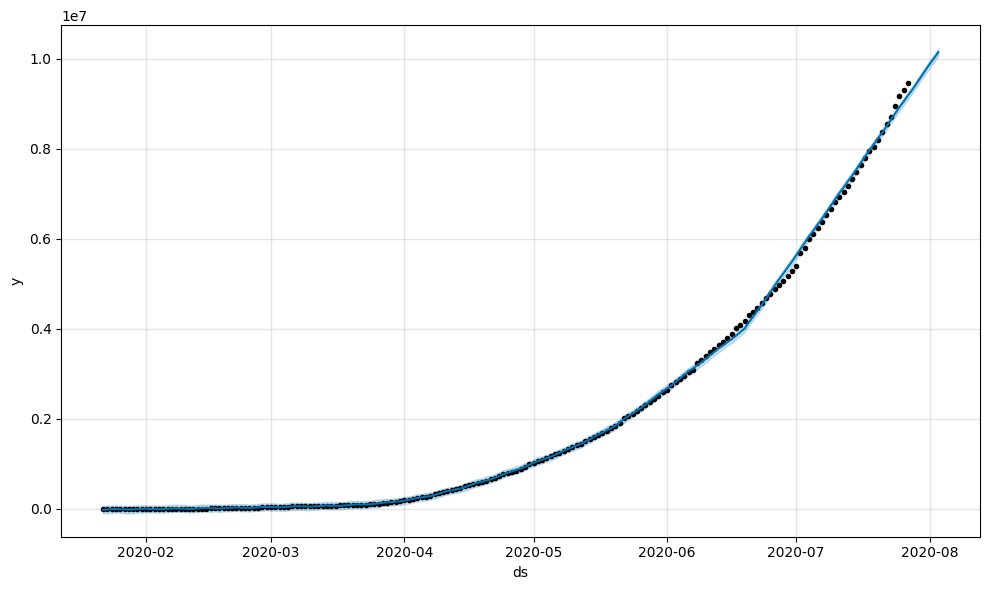

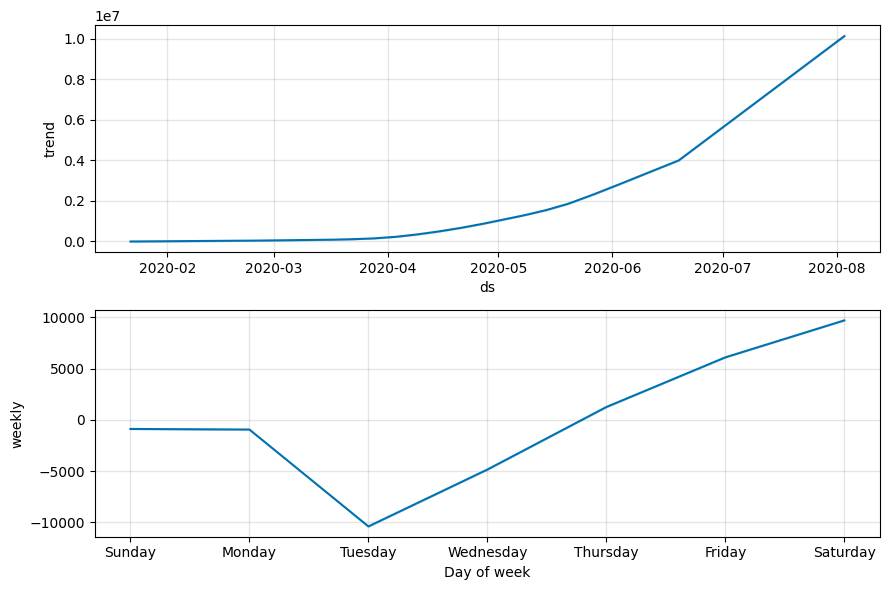

In [46]:
# Reported Cases
t_Recovered.columns=['ds','y']
t_Recovered['ds']=pd.to_datetime(t_Recovered['ds'])

model=Prophet()
model.fit(t_Recovered)

future=model.make_future_dataframe(periods=7,freq='D')

forecast=model.predict(future)
forecast[['yhat' ,'yhat_lower',	'yhat_upper']]=forecast[['yhat','yhat_lower','yhat_upper']].astype(int)

print(forecast[['ds','yhat','yhat_lower','yhat_upper']])
print(model.plot(forecast))
print(model.plot_components(forecast))

# Conclusion
1.On trend basis graph we can say that there is exponential growth in Recovered Cases.

2.On weekly basis graph we can say that on tuesday the recovery rate is low and is increasing as it tends to saturday.




